# Scaling

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Transform numerical data into same range (typically small). Some method may work best with scaling
ex. KNN, Neural Network, Linear Model
<br>
Scaling:
- MinMax Scaler
- Standard Scaler
- Robust Scaler

In [2]:
# Read Data
tips = sns.load_dataset('tips')

In [3]:
# Check Info Data
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


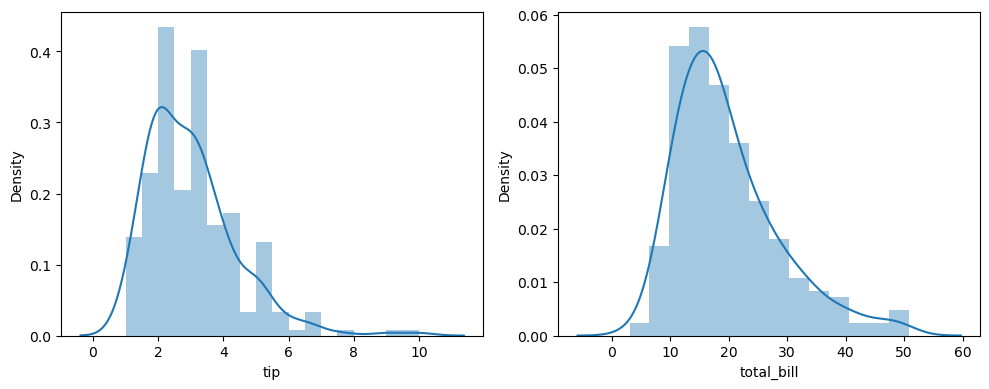

In [4]:
# Data Visualization Distributions

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.distplot(tips['tip'])
plt.subplot(1,2,2)
sns.distplot(tips['total_bill'])
plt.tight_layout()

In [5]:
# Statistical Descriptive Feature tip & total_bill
tips[['tip', 'total_bill']].describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


from illustration above, you can see the range and descriptive statistics of each variables, tips and total bill. we will transform these variables into smaller range using:
- min max scaler
- standard scaler
- robust scaler

In [6]:
# Import Library for Normalization

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [7]:
# Select Feature X: tip & total_bill 
X = ['tip', 'total_bill']

In [9]:
# Define Variable for Normalization functions
minmax = MinMaxScaler()
standard = StandardScaler()
robusts_caler = RobustScaler()

In [10]:
X_data = tips[X]
X_data

,tip,total_bill
0,1.01,16.99
1,1.66,10.34
2,3.50,21.01
3,3.31,23.68
4,3.61,24.59
...,...,...
239,5.92,29.03
240,2.00,27.18
241,2.00,22.67
242,1.75,17.82


> ## **MinMax**

Transform setiap variable ke dalam interval 0 - 1

\begin{align}
z_i = \frac{x_i - min(x_i)}{max(x_i) - min(x_i)}
\end{align}



In [14]:
# minmax fit_transform(X)
# Save results as New DataFrame after normalization MinMax

X_minmax = minmax.fit_transform(X_data)
X_minmax = pd.DataFrame(X_minmax,columns=X)
X_minmax

,tip,total_bill
0,0.001111,0.291579
1,0.073333,0.152283
2,0.277778,0.375786
3,0.256667,0.431713
4,0.290000,0.450775
...,...,...
239,0.546667,0.543779
240,0.111111,0.505027
241,0.111111,0.410557
242,0.083333,0.308965


In [15]:
# Statistical Descriptive X Features with normalization MinMax
X_minmax.describe()

,tip,total_bill
count,244.000000,244.000000
mean,0.222031,0.350145
std,0.153738,0.186477
min,0.000000,0.000000
25%,0.111111,0.215281
50%,0.211111,0.308442
75%,0.284722,0.441087
max,1.000000,1.000000


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

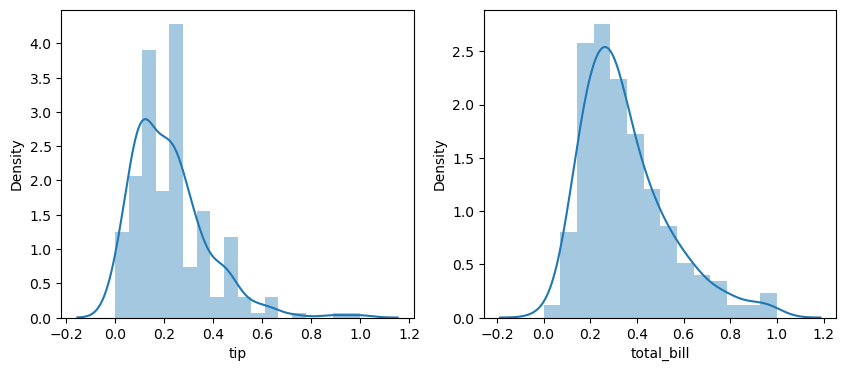

In [16]:
# Check Distributions

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.distplot(X_minmax['tip'])
plt.subplot(1,2,2)
sns.distplot(X_minmax['total_bill'])

**Interpretation** : 
-Norrmalisai Data variabel tip dan total_bill menggunakan MinMAx Scaler mengubah range data menjadi 0-1
  


> ## **StandardScaler**

Transform setiap variabel ke : mean = 0 stddev = 1


\begin{align}
z_i = \frac{x_i - \bar{x}}{s}
\end{align}

In [11]:
# standard fit_transform(X)
# Save results as New DataFrame after normalization Standardization

X_standard = standard.fit_transform(X_data)
X_standard = pd.DataFrame(X_standard, columns=X)
X_standard

,tip,total_bill
0,-1.439947,-0.314711
1,-0.969205,-1.063235
2,0.363356,0.137780
3,0.225754,0.438315
4,0.443020,0.540745
...,...,...
239,2.115963,1.040511
240,-0.722971,0.832275
241,-0.722971,0.324630
242,-0.904026,-0.221287


In [12]:
# Statistical Descriptive X Features with normalization Standardization
X_standard.describe()

,tip,total_bill
count,2.440000e+02,2.440000e+02
mean,2.846297e-16,-6.597637e-17
std,1.002056e+00,1.002056e+00
min,-1.447189e+00,-1.881547e+00
25%,-7.229713e-01,-7.247111e-01
50%,-7.117518e-02,-2.241005e-01
75%,4.086192e-01,4.886857e-01
max,5.070772e+00,3.492068e+00


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

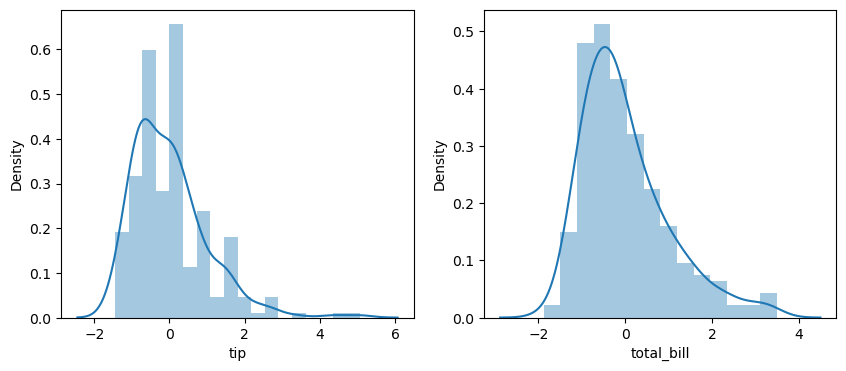

In [13]:
# Check Distributions

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.distplot(X_standard['tip'])
plt.subplot(1,2,2)
sns.distplot(X_standard['total_bill'])


**Interpretation** : 
Normalisasi data variabel tip dan total bill mengguakan StandardScaler mengubah range dta berdasarkan mean dan std  


> ## RobustScaler

Transform each variabel into small range

\begin{align}
z_i = \frac{x_i - Q_1(x_i)}{Q_3(x_i) - Q_1(x_i)}
\end{align}



In [17]:
# standard fit_transform(X)
# Save results as New DataFrame after normalization Robust Scaler
X_robust = robusts_caler.fit_transform(X_data)
X_robust = pd.DataFrame(X_robust, columns=X)
X_robust


,tip,total_bill
0,-1.2096,-0.074675
1,-0.7936,-0.691558
2,0.3840,0.298237
3,0.2624,0.545918
4,0.4544,0.630334
...,...,...
239,1.9328,1.042208
240,-0.5760,0.870594
241,-0.5760,0.452226
242,-0.7360,0.002319


In [18]:
# Statistical Descriptive X Features with normalization Robust Scaler
X_robust.describe()


,tip,total_bill
count,244.000000,2.440000e+02
mean,0.062898,1.846886e-01
std,0.885528,8.258267e-01
min,-1.216000,-1.365955e+00
25%,-0.576000,-4.125696e-01
50%,0.000000,-1.647987e-16
75%,0.424000,5.874304e-01
max,4.544000,3.062616e+00


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

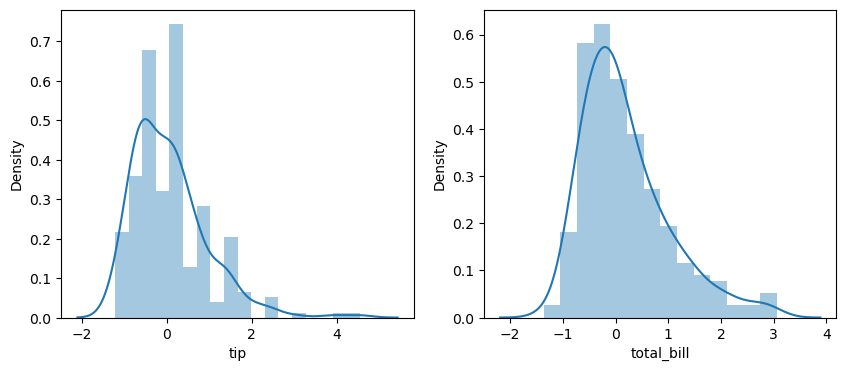

In [19]:
# Check Distributions

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.distplot(X_robust['tip'])
plt.subplot(1,2,2)
sns.distplot(X_robust['total_bill'])

**Interpretation**
Normalisasi data menggnakan Robut Scaler membuat range/skala data menjadi lebih kecil

# **Encoding**

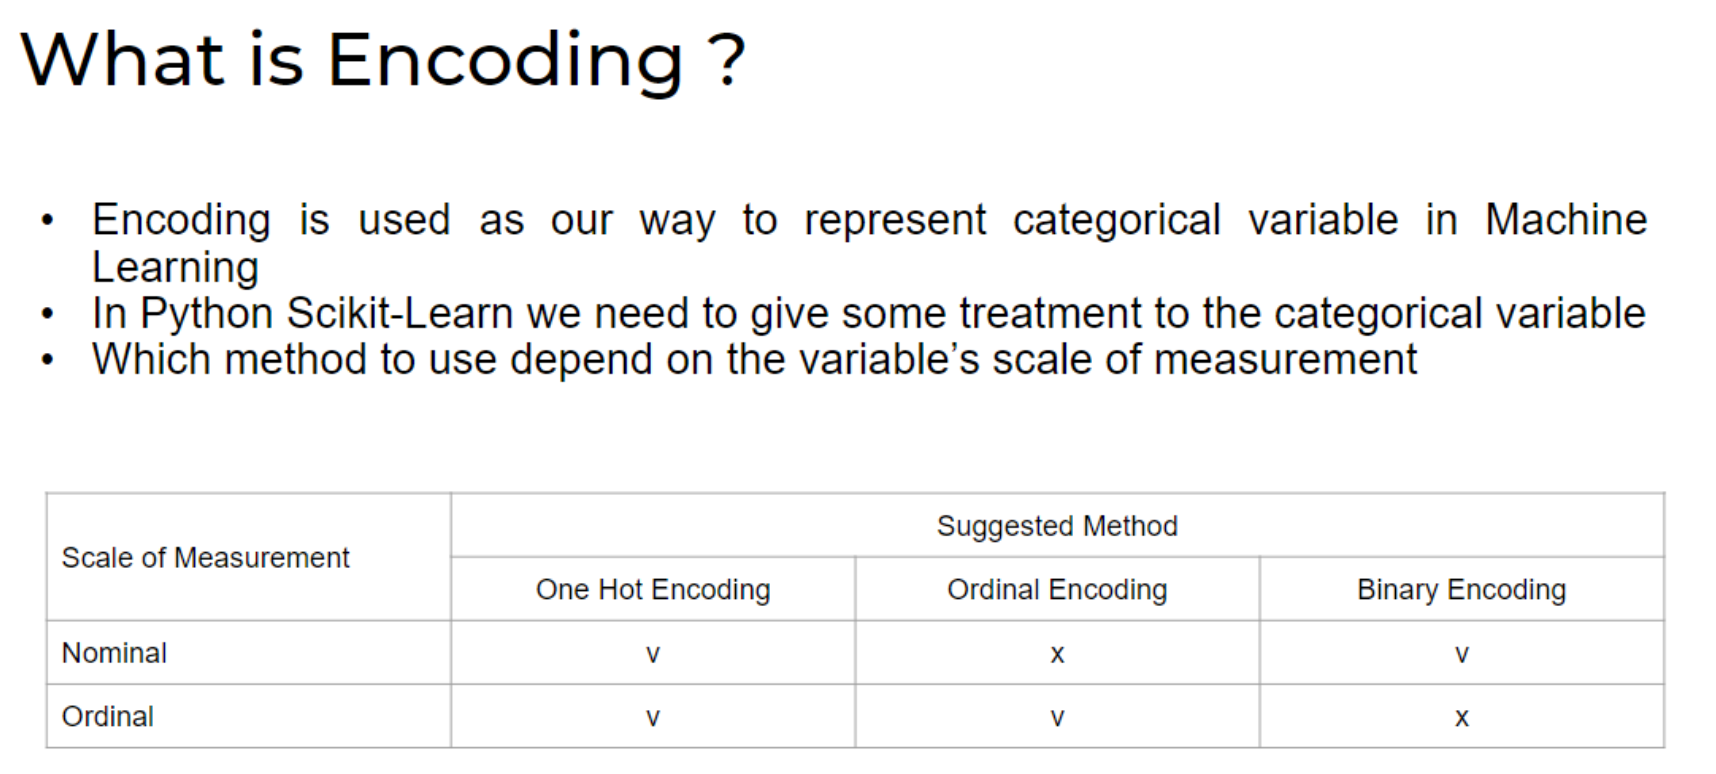

> ## **Pandas Get Dummies** 

**One Hot Encoding** using pd.get_dummies

In [20]:
# Load Dataset Tips
# Show Data
tips = sns.load_dataset('tips')


In [21]:
# Show Data Info
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [23]:
# List Column Categorical
# Check value_counts each categorical feature using For Looping

column_cat = ['sex', 'smoker', 'day', 'time']

for column in column_cat :
    print(tips[column].value_counts())
    print ('')


Male      157
Female     87
Name: sex, dtype: int64

No     151
Yes     93
Name: smoker, dtype: int64

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

Dinner    176
Lunch      68
Name: time, dtype: int64



**Interpretation**

In [26]:
# Create new dataFrame based on encoding using pd.get_dummies(data, columns=[list column])
data_dummies = pd.get_dummies(tips, columns = column_cat)

In [27]:
# Show Data
data_dummies

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2.00,2,1,0,1,0,0,0,1,0,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1


> ## **One Hot Encoding**

One Hot Encoding also can be implemented using sklearn library. we use OneHotEncoder and ColumnTransformer classes. OneHotEncoder for the one hot encoding method and ColumnTransformer to select which variable to transform.

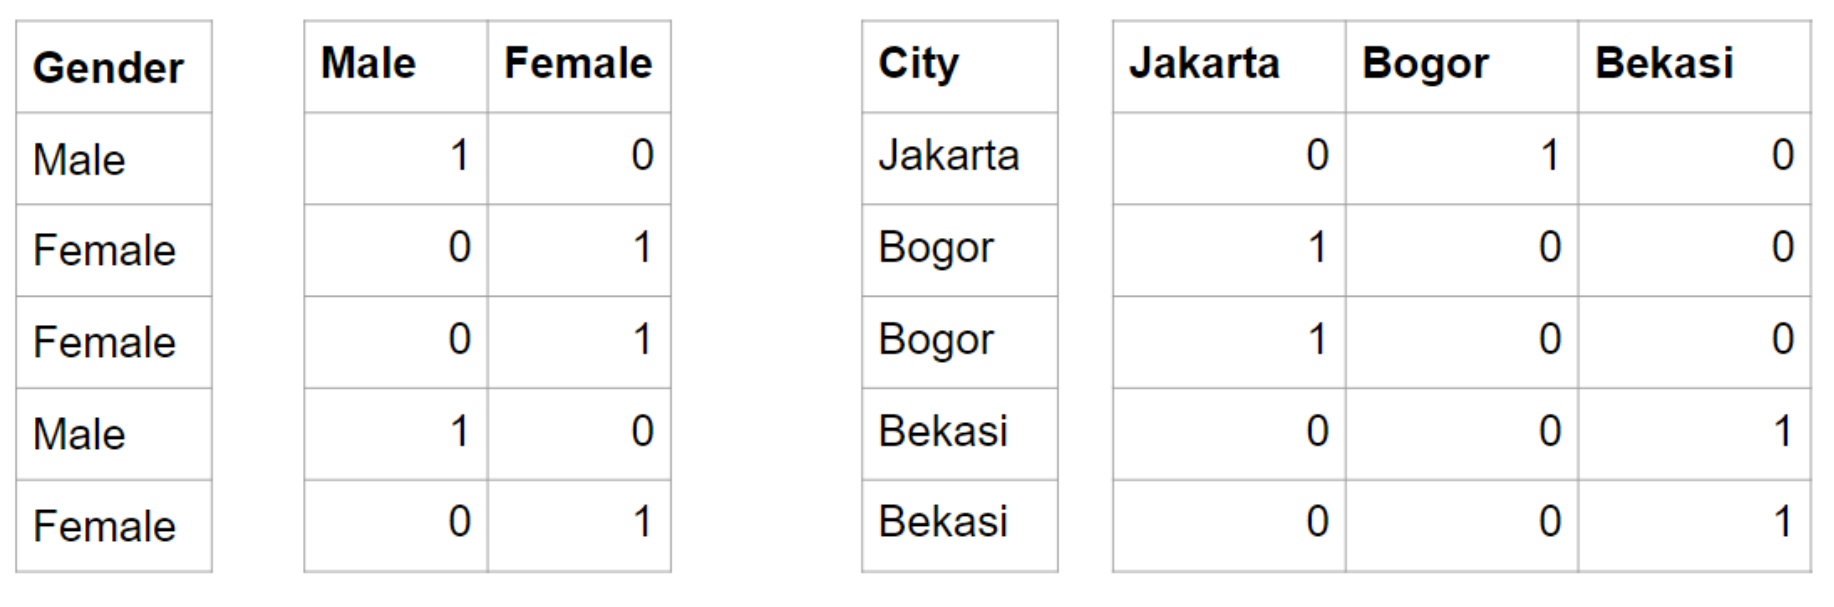

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [29]:
column_cat

['sex', 'smoker', 'day', 'time']

In [32]:
# Create list column
# Create Transformer Column using
# ColumnTransformer([
#                   ('encoder',OneHotEncoder(),['sex','smoker','day','time'])
#                 ])

transfomer = ColumnTransformer([
                                ('encoder', OneHotEncoder(), column_cat)
                            ])


In [31]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [35]:
# Create New DataFrame based on transformer.fit_transform(tips) as tips_encoded
# Change DataType as int

tips_encoder_sci = transfomer.fit_transform(tips)
tips_encoder_sci = tips_encoder_sci.astype(int)
tips_encoder_sci

array([[1, 0, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 1, 0]])

In [36]:
tips_encoder_sci = pd.DataFrame(transfomer.fit_transform(tips))
tips_encoder_sci

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [37]:
# get features name using built-in-functions .get_feature_names()
transfomer.get_feature_names()

['encoder__x0_Female',
 'encoder__x0_Male',
 'encoder__x1_No',
 'encoder__x1_Yes',
 'encoder__x2_Fri',
 'encoder__x2_Sat',
 'encoder__x2_Sun',
 'encoder__x2_Thur',
 'encoder__x3_Dinner',
 'encoder__x3_Lunch']

In [38]:
# Re-define columns based on transformer feature name
# Combine Data using concatinating and axis = 1
tips_encoder_sci.columns = transfomer.get_feature_names()
tips_encoder_sci

,encoder__x0_Female,encoder__x0_Male,encoder__x1_No,encoder__x1_Yes,encoder__x2_Fri,encoder__x2_Sat,encoder__x2_Sun,encoder__x2_Thur,encoder__x3_Dinner,encoder__x3_Lunch
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


> ## **Ordinal Encoding using .map**

We illustrate implementation of Ordinal encoding using .map and category_encoder library. This library can be integrated with scikit learn library and can be used in modeling process aswell.

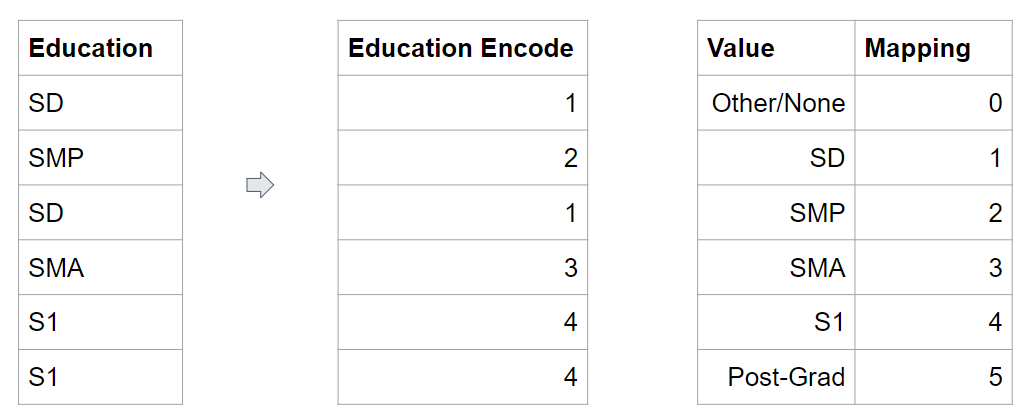

In [40]:
# Copy dataFrame tips
tips_ordinal_encoded = tips.copy()

In [41]:
# Check value_counts feature day
tips_ordinal_encoded['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [42]:
# Create dictionary ordinal
# Change day feature using .map({dictionary})
tips_ordinal_encoded['day'] = tips_ordinal_encoded['day'].map({'None': 0, 'Thur' : 1, 'Fri': 2, 'Sat': 3, 'Sun':4})

In [43]:
# Data Show
tips_ordinal_encoded

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,4,Dinner,2
1,10.34,1.66,Male,No,4,Dinner,3
2,21.01,3.50,Male,No,4,Dinner,3
3,23.68,3.31,Male,No,4,Dinner,2
4,24.59,3.61,Female,No,4,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,3,Dinner,3
240,27.18,2.00,Female,Yes,3,Dinner,2
241,22.67,2.00,Male,Yes,3,Dinner,2
242,17.82,1.75,Male,No,3,Dinner,2


> ## **Ordinal Encoding** using category_encoders library

In [44]:
!pip install category_encoders

     -------------------------------------- 81.2/81.2 kB 503.1 kB/s eta 0:00:00


In [46]:
#import library category encoders
import category_encoders as ce

In [55]:

ordinal_mapping = [
    {'col':'day',
    'mapping':{None:0,'Thur':1,'Fri':2,'Sat':3,'Sun':4}},
   {'col':'time',
   'mapping':{None:0,'Lunch':1,'Dinner':2}}
    ]

ordinal_encoder = ce.OrdinalEncoder(cols = ['day', 'time'], mapping = ordinal_mapping)
dford = ordinal_encoder.fit_transform(tips[['day','time']])
dford


,day,time
0,4,2
1,4,2
2,4,2
3,4,2
4,4,2
...,...,...
239,3,2
240,3,2
241,3,2
242,3,2


In [57]:
# Concat DataFrame as tips_ordinal_encoded with axis = 1
tips_ordinal_encoded =  pd.concat([tips[['total_bill','tip','size']], dford], axis = 1)
tips_ordinal_encoded

,total_bill,tip,size,day,time
0,16.99,1.01,2,4,2
1,10.34,1.66,3,4,2
2,21.01,3.50,3,4,2
3,23.68,3.31,2,4,2
4,24.59,3.61,4,4,2
...,...,...,...,...,...
239,29.03,5.92,3,3,2
240,27.18,2.00,2,3,2
241,22.67,2.00,2,3,2
242,17.82,1.75,2,3,2


In [ ]:
# Ordinal mapping with transform more than 1 variables (day & time)



In [ ]:
# Concat DataFrame as tips_ordinal_encoded with axis = 1


> ## **Binary Encoding**

Binary encoding using category_encoder library. We will implement binary ecoding using the category_encoders library. We will implement binary encoding to day variable.

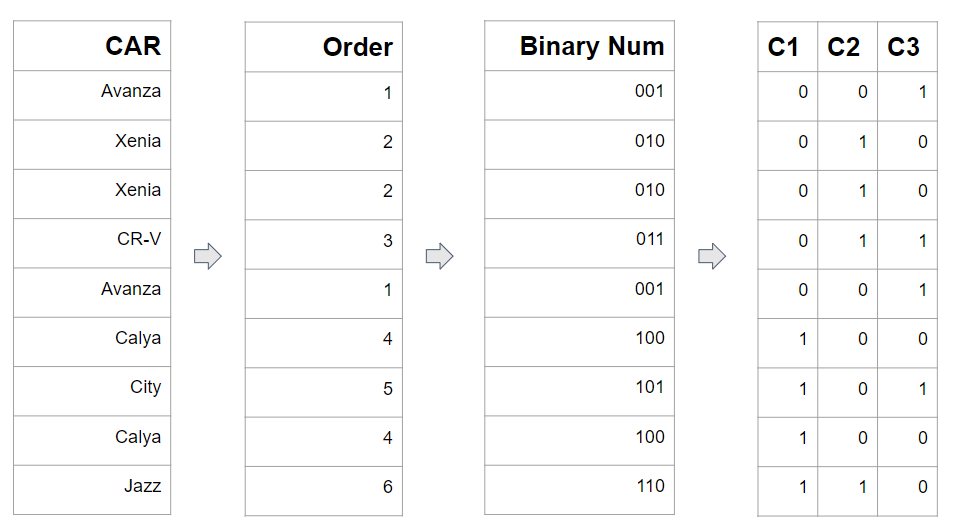

In [58]:
import category_encoders as ce

In [62]:
binary_encoder = ce.BinaryEncoder(cols =['day'])
dfbin = binary_encoder.fit_transform(tips['day'])
dfbin

,day_0,day_1,day_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
239,0,1,0
240,0,1,0
241,0,1,0
242,0,1,0


In [63]:
# Concat DataFrame as tips_binary_encoded with axis = 1
tips_binary_encoded = pd.concat([dfbin,tips[['total_bill','tip','size']]], axis=1)
tips_binary_encoded

,day_0,day_1,day_2,total_bill,tip,size
0,0,0,1,16.99,1.01,2
1,0,0,1,10.34,1.66,3
2,0,0,1,21.01,3.50,3
3,0,0,1,23.68,3.31,2
4,0,0,1,24.59,3.61,4
...,...,...,...,...,...,...
239,0,1,0,29.03,5.92,3
240,0,1,0,27.18,2.00,2
241,0,1,0,22.67,2.00,2
242,0,1,0,17.82,1.75,2


# Apply Several Preprocessing Method to Modeling at once Part 1a : Ridge

> ## Table Of Contents

1. data
1. preprocessing
1. data splitting
1. data transform
1. model fitting and evaluation
1. model properties

> ## Data

In [64]:
import category_encoders as ce #Binary Encoder
from sklearn.model_selection import train_test_split # data splitting
from sklearn.linear_model import Ridge # ML model
from sklearn.metrics import mean_squared_error # evaluation
from sklearn.preprocessing import RobustScaler #Normalization Data

In [65]:
tips = sns.load_dataset('tips')

In [66]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


> ## Preprocessing

preprocess scheme:
1. one hot encoding : sex, smoker, time
1. binary encoding : day
1. robust scaler : total_bill
1. no treatment : size

In [69]:
ordinal_mapping = [
    {'col':'day',
    'mapping':{None:0,'Thur':1,'Fri':2,'Sat':3,'Sun':4}}
]
ordinal_encoder = ce.OrdinalEncoder(cols= 'day', mapping=ordinal_mapping)

In [70]:
transformer = ColumnTransformer([
                                 ('one hot encoder', OneHotEncoder(drop = 'first'),['sex','smoker','time']),
                                 ('ordinal_encoder',ce.BinaryEncoder(),['day','time']),
                               ], remainder = 'passthrough')

> ## Data Splitting

we split the data into 70% training set and 30% training set.

In [71]:
features = ['total_bill','sex','smoker','day','time','size']
Define X
Define y


SyntaxError: invalid syntax (694436945.py, line 2)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10)

NameError: name 'y' is not defined

> ## Data Transform

Here, we will do preprocessing step. Like we discuss previously. we apply .fit only to training set and .transform for both training set and test set.

In [72]:
X_train.head()

NameError: name 'X_train' is not defined

In [74]:
X_train_preprocessed = transformer.fit_transform(X_train) # .fit and .transform method
X_test_preprocessed = transformer.transform(X_test) #.transform method

NameError: name 'X_train' is not defined

Like we discuss before, we need to rename our dataframe's columns when using scikit learan package in preprocessing.

In [75]:
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
X_train_preprocessed

NameError: name 'X_train_preprocessed' is not defined

In [77]:
transformer.transformers_

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [78]:
transformer.transformers_[0][1].get_feature_names_out()

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [79]:
transformer.transformers_[1][1].get_feature_names_out()

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [ ]:
# Create list features
# Change column X_train
# Change column X_test

The dataframe's columns are already renamed.

> ## Model Fitting and evaluation

next, we fit the model using traning set and evaluate the model based on test set. We obtain mse 1.0577.

In [ ]:
model = DecisionTreeRegression
model.fit(X_train_preprocessed, y_train)

In [ ]:
# y_pred = model.predict(X_test_preprocessed)
# print('mse:',mean_squared_error(y_test,y_pred))

> ## Model Properties

In this section we show the model properties. We show the linear regression's coefficient for interpretation purpose.

In [ ]:
coef_table = pd.DataFrame({
    'features':features,
    'coef':model.coef_
})

In [ ]:
coef_table

,features,coef
0,x0_Male,-0.219943
1,x1_Yes,-0.071079
2,x2_Lunch,0.116938
3,day_0,0.031693
4,day_1,-0.002460
5,day_2,-0.061386
6,total_bill scaled,1.086144
7,size,0.172890


# Apply Several Preprocessing Method to Modeling at once Part 1b : Tree

> ## Table Of Contents

1. data
1. preprocessing
1. data splitting
1. data transform
1. model fitting and evaluation
1. model properties

> ## Data

In [143]:
from sklearn.tree import DecisionTreeRegressor, plot_tree # ML model

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


> ## Preprocessing

preprocess v1 scheme:
1. one hot encoding : sex, smoker, time
1. ordinal encoding : day
1. no treatment : size, total_bill

In [80]:
ordinal_mapping = [
    {'col':'day',
    'mapping':{None:0,'Fri':1,'Thur':2,'Sat':3,'Sun':4}}
    ]

ordinal_encoder = ce.OrdinalEncoder(cols = 'day',mapping = ordinal_mapping)

In [81]:
transformer = ColumnTransformer([
                                 ('one hot encoder',OneHotEncoder(drop = 'first'),['sex','smoker','time']),
                                 ('ordinal encoder', ordinal_encoder,['day'])
                                ], remainder = 'passthrough')

preprocess v2:
1. one hot encoding : sex, smoker
1. ordinal encoding : time, day
1. no treatment : size, total_bill

In [82]:
ordinal_mapping = [
    {'col':'day',
    'mapping':{None:0,'Fri':1,'Thur':2,'Sat':3,'Sun':4}},
    {'col':'time',
     'mapping':{None:0,'Lunch':1,'Dinner':2}}
    ]

ordinal_encoder = ce.OrdinalEncoder(cols = ['day','time'],mapping = ordinal_mapping)

In [83]:
transformer = ColumnTransformer([
                                 ('one hot encoder',OneHotEncoder(drop = 'first'),['sex','smoker']),
                                 ('ordinal encoder',ordinal_encoder,['day','time'])
                                ], remainder = 'passthrough')

> ## Data Splitting

splitting the data into 70% training set and 30% training set.

In [84]:
features = ['total_bill','sex','smoker','day','time','size']
X = tips[features]
y = tips['tip']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10)

> ## Data Transform

applying .fit only to training set and .transform for both training set and test set.

In [86]:
X_train.head()

,total_bill,sex,smoker,day,time,size
58,11.24,Male,Yes,Sat,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
68,20.23,Male,No,Sat,Dinner,2
184,40.55,Male,Yes,Sun,Dinner,2


In [87]:
X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

renaming each columns

In [88]:
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
X_train_preprocessed

,0,1,2,3,4,5
0,1.0,1.0,3.0,2.0,11.24,2.0
1,1.0,0.0,4.0,2.0,10.34,3.0
2,1.0,0.0,4.0,2.0,21.01,3.0
3,1.0,0.0,3.0,2.0,20.23,2.0
4,1.0,1.0,4.0,2.0,40.55,2.0
...,...,...,...,...,...,...
178,1.0,0.0,3.0,2.0,17.59,3.0
179,1.0,0.0,4.0,2.0,21.58,2.0
180,1.0,0.0,3.0,2.0,13.28,2.0
181,0.0,0.0,2.0,1.0,29.80,6.0


In [89]:
transformer.transformers_

[('one hot encoder', OneHotEncoder(drop='first'), ['sex', 'smoker']),
 ('ordinal encoder',
  OrdinalEncoder(cols=['day', 'time'],
                 mapping=[{'col': 'day', 'data_type': dtype('O'),
                           'mapping': None    0
  Fri     1
  Thur    2
  Sat     3
  Sun     4
  dtype: int64},
                          {'col': 'time', 'data_type': dtype('O'),
                           'mapping': None      0
  Lunch     1
  Dinner    2
  dtype: int64}]),
  ['day', 'time']),
 ('remainder', 'passthrough', [0, 5])]

In [90]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Male', 'x1_Yes'], dtype=object)

In [91]:
transformer.transformers_[1][1].get_feature_names()

['day', 'time']

In [92]:
features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1].get_feature_names() + ['total_bill','size']
X_train_preprocessed.columns = features
X_test_preprocessed.columns = features
X_train_preprocessed

,x0_Male,x1_Yes,day,time,total_bill,size
0,1.0,1.0,3.0,2.0,11.24,2.0
1,1.0,0.0,4.0,2.0,10.34,3.0
2,1.0,0.0,4.0,2.0,21.01,3.0
3,1.0,0.0,3.0,2.0,20.23,2.0
4,1.0,1.0,4.0,2.0,40.55,2.0
...,...,...,...,...,...,...
178,1.0,0.0,3.0,2.0,17.59,3.0
179,1.0,0.0,4.0,2.0,21.58,2.0
180,1.0,0.0,3.0,2.0,13.28,2.0
181,0.0,0.0,2.0,1.0,29.80,6.0


> ## Model Fitting and evaluation

fitting the model using traning set and evaluate the model based on test set. We obtain mse 0.8414.

In [93]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(X_train_preprocessed, y_train)

NameError: name 'DecisionTreeRegressor' is not defined

In [123]:
# y_pred = model.predict(X_test_preprocessed)
# print('mse:',mean_squared_error(y_test,y_pred))

> ## Model Properties

feature importances and the decision tree.

In [ ]:
# Create New dataFrame as importance Table
# importance_table = pd.DataFrame({
#     'imp':model.feature_importances_
# }, index = features)

In [ ]:
# importance_table

In [ ]:
# importance_table.plot(kind = 'barh')

In [ ]:
# plt.figure(figsize = (20,14))
# plot_tree(model, feature_names = features,filled = True)
# plt.show()

# **Handling Missing Value**

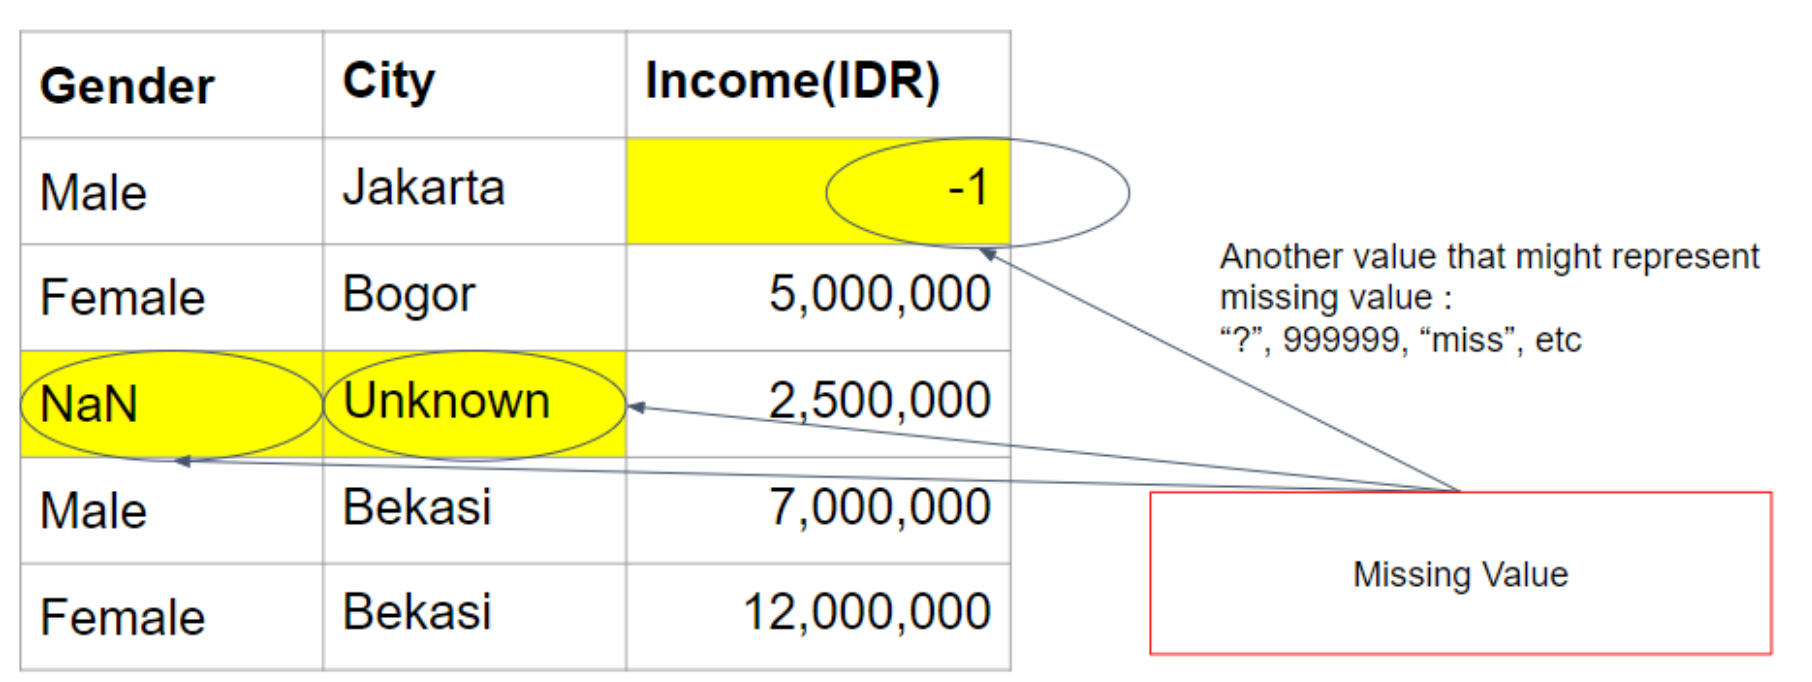

> ## Simple Imputer

In [94]:
from sklearn.impute import SimpleImputer

In [95]:
df = pd.DataFrame({
    'x1':[4,5,np.nan,6,7,9],
    'x2':[3,5,6,5,np.nan,5],
    'x3':[10,11,12,9,8,11],
    'x4':['A','A','C','C','D',np.nan],
    'x5':['X','Y','X','X',np.nan,'Y'],
    'x6':['M','M',np.nan,'M','N',np.nan]
    })

we have a dataframe and each variabels has at least one missing value.

In [96]:
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10,A,X,M
1,5.0,5.0,11,A,Y,M
2,NaN,6.0,12,C,X,NaN
3,6.0,5.0,9,C,X,M
4,7.0,NaN,8,D,NaN,N
5,9.0,5.0,11,NaN,Y,NaN


then we input missing value of the each numerical variabel, x1 x2 and x3, using its mean. If you are more interested in median you can change the argument into "median". 

In [99]:
imp_num = SimpleImputer(strategy='mean')
df[['x1','x2']] = imp_num.fit_transform(df[['x1','x2']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10.0,A,X,M
1,5.0,5.0,11.0,A,Y,M
2,6.2,6.0,12.0,C,X,NaN
3,6.0,5.0,9.0,C,X,M
4,7.0,4.8,8.0,D,NaN,N
5,9.0,5.0,11.0,NaN,Y,NaN


Missing values in the categorical variables, x4 anf x5, will be inputed using mode.

In [100]:
imp_mode = SimpleImputer(strategy='most_frequent')
df[['x4','x5']] = imp_mode.fit_transform(df[['x4','x5']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10.0,A,X,M
1,5.0,5.0,11.0,A,Y,M
2,6.2,6.0,12.0,C,X,NaN
3,6.0,5.0,9.0,C,X,M
4,7.0,4.8,8.0,D,X,N
5,9.0,5.0,11.0,A,Y,NaN


for the last variabel we input the missing value using certain value. this technique also can be applied in some condition.

In [104]:
imp_const = SimpleImputer(strategy='constant', fill_value = 'K')
df[['x6']] = imp_const.fit_transform(df[['x6']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10.0,A,X,M
1,5.0,5.0,11.0,A,Y,M
2,6.2,6.0,12.0,C,X,P
3,6.0,5.0,9.0,C,X,M
4,7.0,4.8,8.0,D,X,N
5,9.0,5.0,11.0,A,Y,P


> ## Iterative Imputer

interative imputer works for numerical only. You can fill the missing value simultaneusly.

In [105]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [106]:
df = pd.DataFrame({
    'x1':[4.3,5.1,np.nan,6.3,7.4,9.1],
    'x2':[2.9,5.1,6.3,4.9,np.nan,5.4],
    'x3':[9,11.1,np.nan,8.9,9.1,11.0],
    'x4':['A','A','C','C','D','D']
    })

In [107]:
df

,x1,x2,x3,x4
0,4.3,2.9,9.0,A
1,5.1,5.1,11.1,A
2,NaN,6.3,NaN,C
3,6.3,4.9,8.9,C
4,7.4,NaN,9.1,D
5,9.1,5.4,11.0,D


In [108]:
imp_iter = IterativeImputer(max_iter=10, random_state=0)
df[['x1','x2','x3']] = imp_iter.fit_transform(df[['x1','x2','x3']])

In [109]:
df

,x1,x2,x3,x4
0,4.30000,2.900000,9.000000,A
1,5.10000,5.100000,11.100000,A
2,7.18363,6.300000,9.823389,C
3,6.30000,4.900000,8.900000,C
4,7.40000,5.073866,9.100000,D
5,9.10000,5.400000,11.000000,D


> ##  Nearest Neighbour Imputer

Nearest negihbour imputer also work for numerical only. You can also fill the missing value simultaneusly.

In [110]:
from sklearn.impute import KNNImputer

In [111]:
df = pd.DataFrame({
    'x1':[4.3,5.1,np.nan,6.3,7.4,9.1],
    'x2':[2.9,5.1,6.3,4.9,np.nan,5.4],
    'x3':[9,11.1,np.nan,8.9,9.1,11.0],
    'x4':['A','A','C','C','D','D']
    })

In [112]:
df

,x1,x2,x3,x4
0,4.3,2.9,9.0,A
1,5.1,5.1,11.1,A
2,NaN,6.3,NaN,C
3,6.3,4.9,8.9,C
4,7.4,NaN,9.1,D
5,9.1,5.4,11.0,D


In [113]:
imp_knn = KNNImputer(n_neighbors=2, weights="uniform")
df[['x1','x2','x3']] = imp_knn.fit_transform(df[['x1','x2','x3']])

In [114]:
df

,x1,x2,x3,x4
0,4.3,2.90,9.00,A
1,5.1,5.10,11.10,A
2,7.1,6.30,11.05,C
3,6.3,4.90,8.90,C
4,7.4,5.15,9.10,D
5,9.1,5.40,11.00,D


# Binning

There is some many kind of relationship exists. Binning can help us capture any type of relationship in the modeling. We will give an illustration about example of binning method and performance improvement using binning.

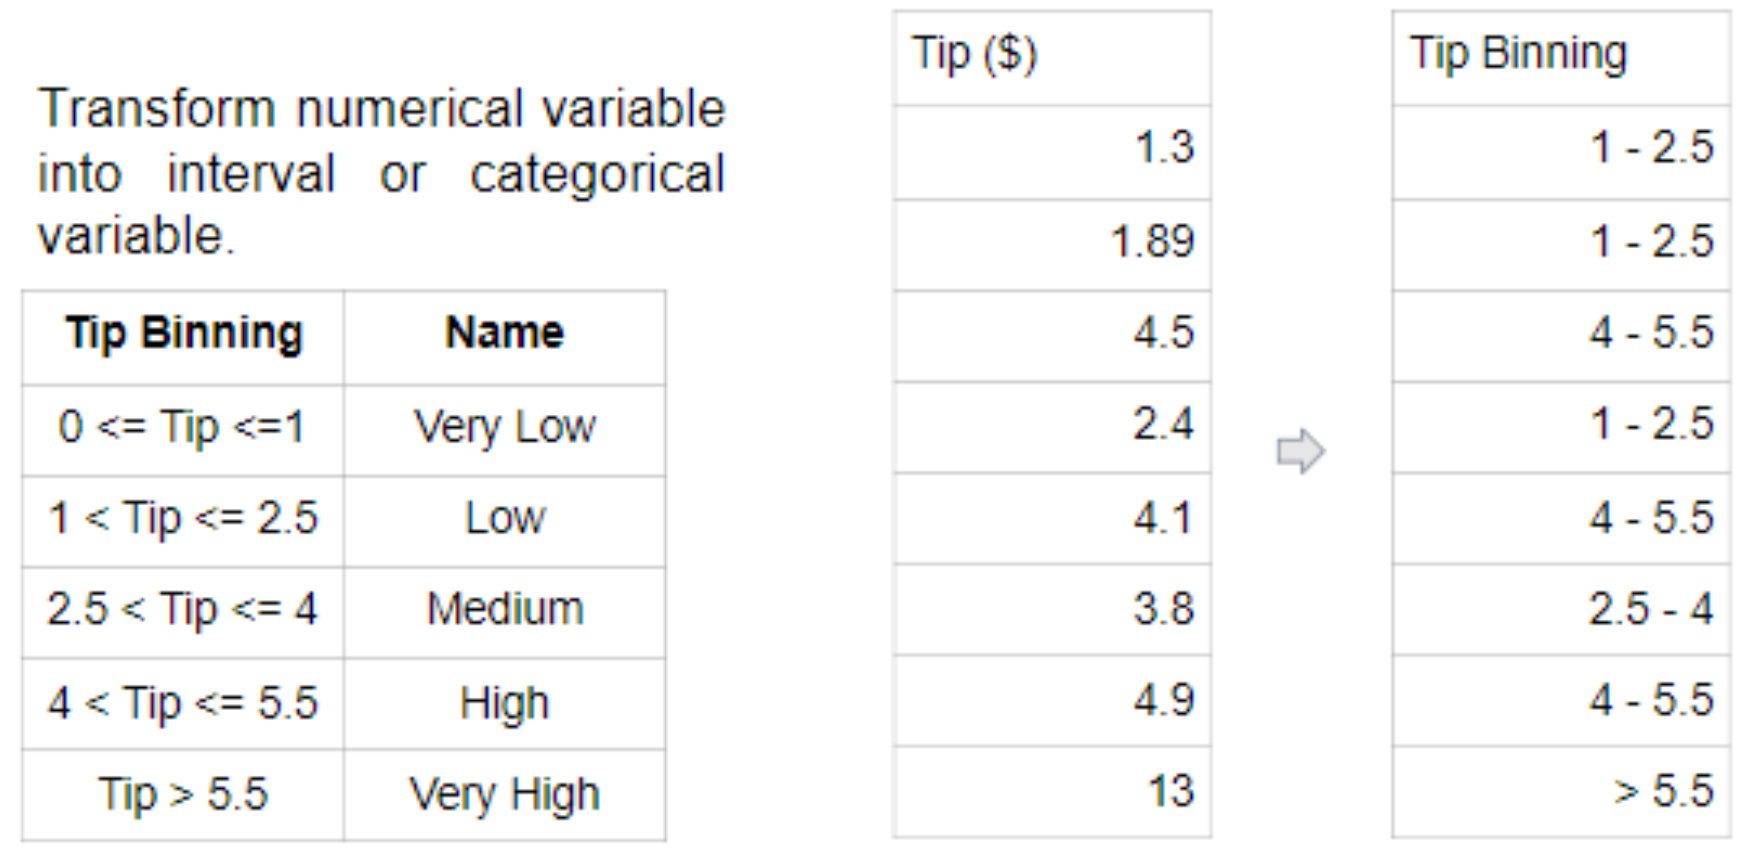

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


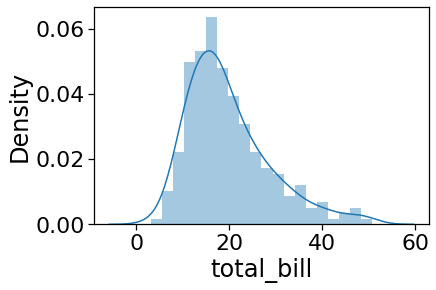

In [ ]:
sns.distplot(tips['total_bill'],bins=20)

In [ ]:
tips['total bill eqfreq'] = pd.qcut(tips['total_bill'],5)
tips['total bill eqfreq encode'] = pd.qcut(tips['total_bill'],5, labels = range(1,6))

In [ ]:
tips['total bill eqintv'] = pd.cut(tips['total_bill'],5)
tips['total bill eqintv encode'] = pd.cut(tips['total_bill'],5, labels = range(1,6))

In [ ]:
tips[['total_bill','total bill eqfreq','total bill eqintv','total bill eqfreq encode','total bill eqintv encode']]

,total_bill,total bill eqfreq,total bill eqintv,total bill eqfreq encode,total bill eqintv encode
0,16.99,"(16.222, 19.818]","(12.618, 22.166]",3,2
1,10.34,"(3.069, 12.636]","(3.022, 12.618]",1,1
2,21.01,"(19.818, 26.098]","(12.618, 22.166]",4,2
3,23.68,"(19.818, 26.098]","(22.166, 31.714]",4,3
4,24.59,"(19.818, 26.098]","(22.166, 31.714]",4,3
...,...,...,...,...,...
239,29.03,"(26.098, 50.81]","(22.166, 31.714]",5,3
240,27.18,"(26.098, 50.81]","(22.166, 31.714]",5,3
241,22.67,"(19.818, 26.098]","(22.166, 31.714]",4,3
242,17.82,"(16.222, 19.818]","(12.618, 22.166]",3,2


> ## Equal Frequencies : Quantile

Binning method which resullted of the equal frequency in each classes and different length of the classes.

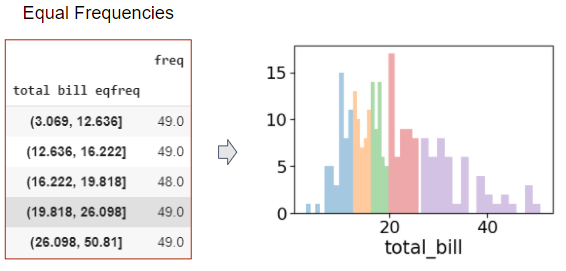

In [ ]:
eqfreq = tips.pivot_table(
    index = 'total bill eqfreq',
    aggfunc = len, 
    values='tip')
eqfreq.columns = ['freq']
eqfreq

,freq
total bill eqfreq,
"(3.069, 12.636]",49.0
"(12.636, 16.222]",49.0
"(16.222, 19.818]",48.0
"(19.818, 26.098]",49.0
"(26.098, 50.81]",49.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


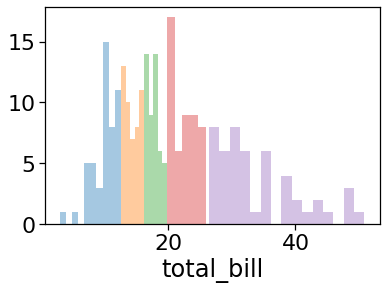

In [ ]:
for i,j in zip(range(1,6),[10,5,5,5,15]):
  sns.distplot(tips[tips['total bill eqfreq encode'] == i]['total_bill'],kde = False,bins = j)

> ## Equal Interval : Uniform

Binning method which resullted of the equal length of the classes and different frequency in each classes.

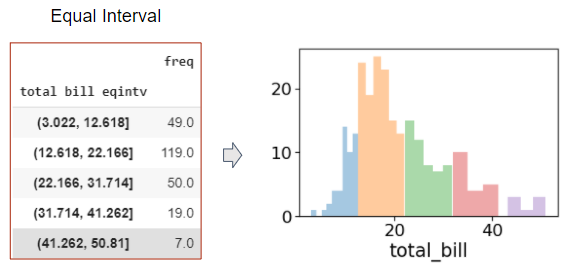

In [ ]:
eqfreq = tips.pivot_table(
    index = 'total bill eqintv',
    aggfunc = len, 
    values='tip')
eqfreq.columns = ['freq']
eqfreq

,freq
total bill eqintv,
"(3.022, 12.618]",49.0
"(12.618, 22.166]",119.0
"(22.166, 31.714]",50.0
"(31.714, 41.262]",19.0
"(41.262, 50.81]",7.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


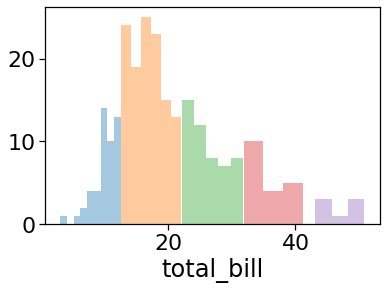

In [ ]:
for i in range(1,6):
  sns.distplot(tips[tips['total bill eqintv encode'] == i]['total_bill'],kde = False)

> ## Binning Effect on Modeling

Now, we want to illustrate how binning can improve model performance. First, we want to do some data exploreation and then go ahead into the modeling process.

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
disk = pd.read_csv('disk.csv')

In [ ]:
disk['class'].value_counts()/disk.shape[0]*100

1    51.863963
0    48.136037
Name: class, dtype: float64

Here, we show you the proportion of each classes. the proportion are almost equal. Then we will do binning to the independent variabel 'x' and compute the prportion of the each classes.

In [ ]:
disk['x eqintv'] = pd.cut(disk['x'],7)
disk['x eqintv encode'] = pd.cut(disk['x'],7, labels = range(1,8))

In [ ]:
disk

,x,class,x eqintv,x eqintv encode
0,51,0,"(46.0, 53.0]",5
1,19,1,"(17.951, 25.0]",1
2,66,1,"(60.0, 67.0]",7
3,35,0,"(32.0, 39.0]",3
4,64,1,"(60.0, 67.0]",7
...,...,...,...,...
1524,58,1,"(53.0, 60.0]",6
1525,64,1,"(60.0, 67.0]",7
1526,47,0,"(46.0, 53.0]",5
1527,26,1,"(25.0, 32.0]",2


In [ ]:
pd.crosstab(disk['x eqintv'],disk['class'], normalize = 0)

class,0,1
x eqintv,,
"(17.951, 25.0]",0.224670,0.775330
"(25.0, 32.0]",0.537037,0.462963
"(32.0, 39.0]",0.835616,0.164384
"(39.0, 46.0]",0.846561,0.153439
"(46.0, 53.0]",0.583673,0.416327
"(53.0, 60.0]",0.302632,0.697368
"(60.0, 67.0]",0.068293,0.931707


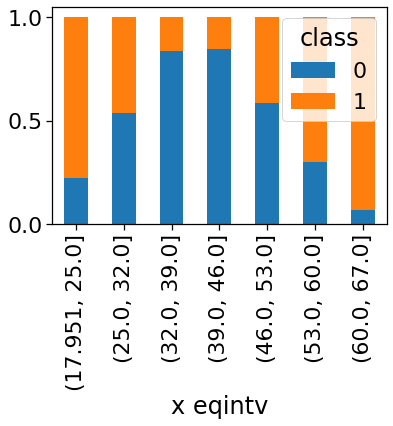

In [ ]:
pd.crosstab(disk['x eqintv'],disk['class'], normalize = 0).plot(kind = 'bar', stacked = True)

from illustration above, you can see that the x variabel alraedy binned into seven categories and you can see the class proportion aswell. The propotion of the '1' class keep decreasing until the fourth class and after that the proportion increase instead. This show a non linear relationship between x and the probability of the '1' class. Adding polynomial feature surely can improve the performance but we will try binning instead.

MODEL 1 : Without binning

This is the modeling when we dont use binning. we dont give any treatment to the feature. The model accuracy is 58.22%.

In [ ]:
X = disk[['x']]
y = disk['class']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state = 2020)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)
print('accuracy',accuracy_score(y_test,y_pred))

accuracy 0.5822454308093995


MODEL 2 : with binning

After we apply binning, the accuracy significantly improve from 58.22% to 69.97%. Binning surely can be used to improve model performance.

In [ ]:
discretize = KBinsDiscretizer(n_bins = 7, encode = 'onehot', strategy = 'uniform')
discretize.fit(X_train) 
X_train_disc = discretize.transform(X_train)
X_test_disc = discretize.transform(X_test)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_disc,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test_disc)
print('accuracy',accuracy_score(y_test,y_pred))

accuracy 0.6997389033942559


# Apply Several Preprocessing Method to Modeling at once Part 2

> ## Table Of Contents

1. Data
1. EDA
1. Missing value Exploration
1. Preprocessing
1. Data Splitting
1. Data Transformation
1. Model fitting and evaluation
1. Model properties

> ## Data

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.
<br>
Fields:
<br>
The dataset contains 16 columns
<br>
Target filed: Income
<br>
-- The income is divide into two classes: 50K
<br>
Number of attributes: 14
<br>
-- These are the demographics and other 
<br>
features to describe a person

We will explore the possibility in predicting income level based on the individual’s personal information.


In [147]:
# Read Data as df_adult


In [148]:
# Statistical Descriptive data


In [149]:
# Data Information


> ## Missing Value

Missing value in this dataset marked with "?"

In [78]:
# df_adult.replace('?',np.nan,inplace = True)

In [160]:
# df_adult.isnull().sum()/df_adult.shape[0]*100

In [161]:
# plt.figure(figsize = (20,20))
# sns.heatmap(df_adult[['workclass','occupation','native.country']].isnull())

The Missing Variable:
1. workclass
1. occupation
1. native.country

> ## Preprocessing

In [162]:
# df_adult.head()

In [163]:
# df_adult.describe()

In [164]:
# categorical_features = df_adult.columns[df_adult.dtypes == object]
# df_adult[categorical_features].describe()

In [84]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

preprocess scheme:
1. one hot encoding : relationship, race, sex
1. binary encoding : workclass, marital status, occupation, native country  
1. ordinal encoding : education (already encoded)
1. no treatment : size

out:
1. fnlwgt

In [165]:
# binary_encoder_pipeline = Pipeline([
#                                     ('imputer',SimpleImputer(strategy = 'constant',fill_value = 'NC')),
#                                     ('binary encoder',ce.BinaryEncoder())
# ])

# transformer = ColumnTransformer([
#                                  ('one hot encoder',OneHotEncoder(drop = 'first'),['relationship','race','sex']),
#                                  ('binary encoder', binary_encoder_pipeline,['workclass','marital.status','occupation','native.country'])
#                                 ], remainder = 'passthrough')

> ## Data Splitting

In [128]:
# Define X = 'fnlwgt','income','education'
# X = df_adult.drop(columns = ['fnlwgt','income','education'])
# y = np.where(df_adult['income']=='>50K',1,0)

In [166]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

> ## Data Transformation

In [167]:
# X_train.head()

In [159]:
# X_train_preprocessed = transformer.fit_transform(X_train)
# X_test_preprocessed = transformer.transform(X_test)

In [158]:
# X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
# X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
# X_train_preprocessed

In [150]:
# transformer.transformers_

In [151]:
# transformer.transformers_[0][1].get_feature_names_out()

In [152]:
# transformer.transformers_[1][1]['binary encoder'].get_feature_names_out()

In [153]:
# features = list(transformer.transformers_[0][1].get_feature_names_out()) + transformer.transformers_[1][1]['binary encoder'].get_feature_names_out() + ['age','education.num','capital.gain','capital.loss','hours.per.week']
# X_train_preprocessed.columns = features
# X_test_preprocessed.columns = features
# X_train_preprocessed

> ## Model Fitting and evaluation

In [154]:
# model = DecisionTreeClassifier(max_depth = 3)
# model.fit(X_train_preprocessed, y_train)

In [155]:
# y_pred = model.predict(X_test_preprocessed)
# print('accuracy:',accuracy_score(y_test,y_pred))

> ## Model Properties

In [156]:
# importance_table = pd.DataFrame({
#     'imp':model.feature_importances_
# }, index = features)

In [157]:
# importance_table

In [146]:
# importance_table.plot(kind = 'barh', figsize = (10,15))

In [145]:
# plt.figure(figsize = (20,14))
# plot_tree(model, feature_names = features,filled = True, class_names = ['<=50K','>50K'])
# plt.show()

# Feature Selection

> ## Table Of Contents

1. data transform
1. feature selection : slect percentile
1. model fitting and evaluation : logistic regression

we will continue the analysis in the illustration before with adding feature selection in the process.

In [ ]:
from sklearn.feature_selection import SelectPercentile

> ## Data Transformation

In [ ]:
X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

> ## Feature Selection Process

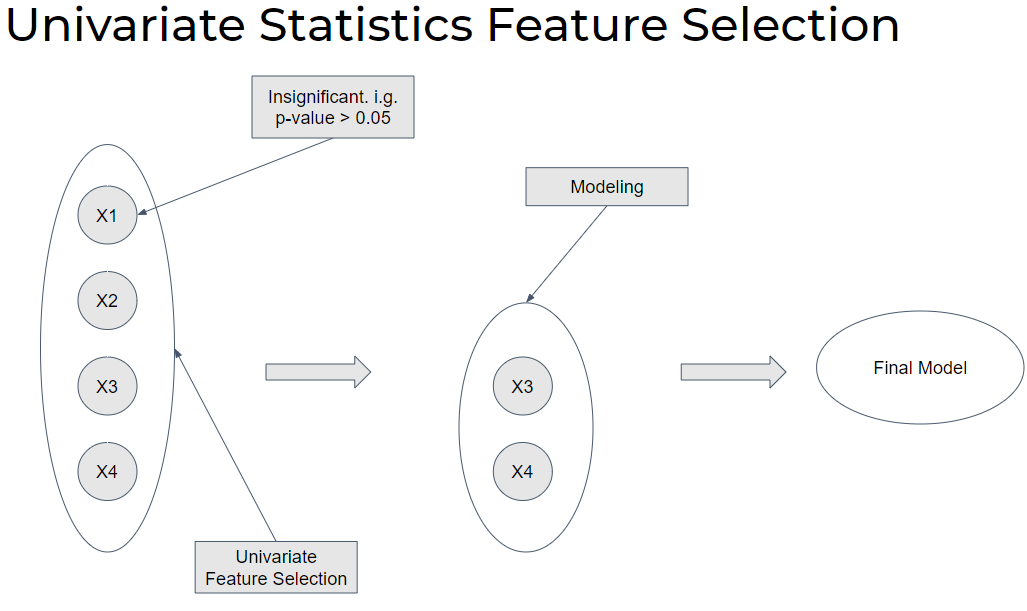

In [ ]:
select = SelectPercentile(percentile = 50)
select.fit(X_train_preprocessed, y_train)

In [ ]:
X_train_preprocessed_selected = select.transform(X_train_preprocessed)
X_test_preprocessed_selected = select.transform(X_test_preprocessed)

In [ ]:
print('before selection',X_train_preprocessed.shape)
print('after selection',X_train_preprocessed_selected.shape)

The selected feature

In [ ]:
mask = select.get_support()

In [ ]:
selected_features = pd.DataFrame({
    'indicator':mask,
    'features':features
})
selected_features[selected_features['indicator']==True]

> ## Model Fitting and evaluation

In [ ]:
model = LogisticRegression(max_iter = 1000, solver = 'liblinear', C = 10)
model.fit(X_train_preprocessed_selected,y_train)
print('score', model.score(X_test_preprocessed_selected, y_test))

In [ ]:
model.coef_[0]

> ## Model Properties

In [ ]:
coef_table = pd.DataFrame({
    'features':selected_features[selected_features['indicator']==True]['features'],
    'coef':model.coef_[0]
})

In [ ]:
coef_table